# ST1 Capstone Project
## Diamond Price Prediction Project

### Angus Chapman
#### u3257979

https://github.com/Gaunsessa/ST1-Assignment

## Step 1: Reading dataset

### Reading and basic cleaning of the dataset
This is the initial step of any data related work. In this step we have loaded the dataset and removed any duplicated rows as well as a useless index column.

In [1]:
# Imports
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import numpy as np
import pickle

%matplotlib inline

In [2]:
# Read diamond data set
ddf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diamonds.csv")

print(f"Data length: {ddf.shape[0]}")

# Drop the index column
ddf.drop(ddf.columns[0], axis=1, inplace=True)

# Drop any duplicate rows
ddf.drop_duplicates(inplace=True)

print(f"Data length (after dropping dupes): {ddf.shape[0]}")

# Inital glance at the dateset
ddf.head()

Data length: 53940
Data length (after dropping dupes): 53794


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Step 2: Problem Statement
* Create a ML model to predict the price of diamonds


## Step 3: Target Variable Identification

Target Variable:
* Price

Predictor Variables:
* Carat
* Cut
* Color
* Clarity
* Depth
* Table
* x, y, z

Suitable Machine Learning Model:
* Linear regression
  * As the target variable is continuous, this will be a suitable and the easiest model to implement

## Step 4: Visualising Distribution of Price

In this step we take a look at price's distribution. This give us a better understanding on what our final model will be best at predicting.

<Axes: >

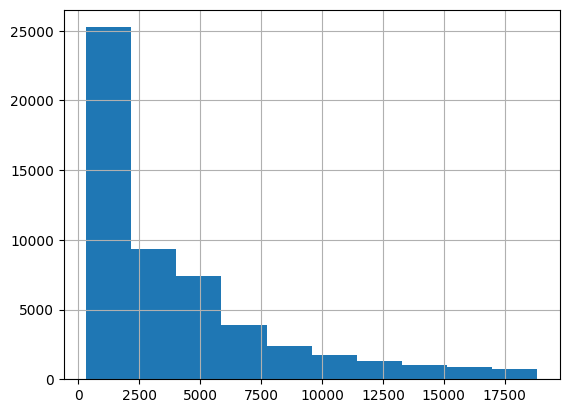

In [3]:
# Display histogram of diamond prices
ddf.price.hist()

### Observations from Step 4:
* There is a significant skew to lower prices
  * This is expected as more expensive diamonds are much rarer
  * This will cause our model to better at pricing lower priced diamonds than higher prices ones. This is acceptable as expensive diamonds tend to be more unique and rare and thus one shouldn't expected them to be priced using algorithms.

## Step 5: Basic Data Exploration

In this step we take an initial glance at our data to start our understandings.

In [4]:
# Looking at 10 random samples
ddf.sample(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
52407,0.71,Ideal,G,VS2,62.5,57.0,2511,5.72,5.68,3.56
9377,0.32,Very Good,I,VVS1,63.0,58.0,589,4.32,4.38,2.74
5044,0.40,Ideal,G,SI2,62.1,53.0,573,4.75,4.78,2.96
42454,0.50,Good,E,SI1,63.7,56.0,1316,5.02,5.06,3.21
27682,2.07,Good,I,VS2,61.8,61.0,18707,8.12,8.16,5.03
45285,0.52,Ideal,G,VS1,60.9,56.0,1662,5.20,5.24,3.18
37341,0.31,Ideal,D,VVS2,61.6,56.0,982,4.38,4.34,2.69
10730,0.32,Very Good,E,VS2,61.6,58.0,594,4.40,4.47,2.73
24462,1.50,Ideal,I,IF,61.3,56.0,12725,7.34,7.41,4.52
3446,1.00,Fair,F,SI1,68.7,55.0,3387,6.06,5.88,4.11


In [5]:
# Looking into column info
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [6]:
# Looking at descriptions of continuous data
ddf.describe(include = np.number)

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
# Looking at descriptions of categorical data
ddf.describe(include = object)

,cut,color,clarity
count,53794,53794,53794
unique,5,7,8
top,Ideal,G,SI1
freq,21488,11262,13032


### Findings from step 5:

* All columns have the same count. Meaning there is no null values
* There are 6 continuous columns (excluding price)
  * Carat
  * Depth
  * Table
  * x, y, z
* There are 3 categorical columns. Shown below worst to best according to the dataset's source
  * Cut: Fair, Good, Very Good, Premium, Ideal
  * Color: J, I, H, G, F, E, D
  * Clarity: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF

\\

At a preliminary glance all of the columns seems to have value in predicting the price of diamonds and thus we will continue to explore them all.

## Step 6: Rejecting Useless Columns

The only useless column (index) was already rejected during the data read step.

## Step 7: Visual Exploration of the Data

In this step we will visualise the distribution of each category, using barcharts for categorical data and histograms for continuous data.

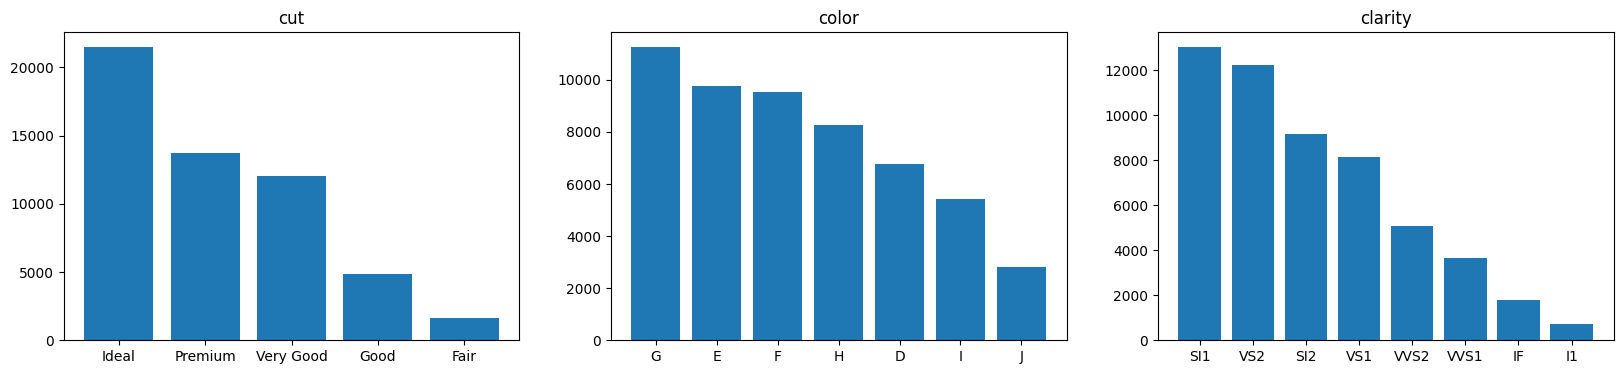

In [8]:
def plt_cat(cats):
  fig, axis = plt.subplots(ncols = len(cats), figsize = (20, 4))

  for i, c in enumerate(cats):
    values = c.value_counts()

    axis[i].bar(values.keys(), values.values)
    axis[i].set_title(c.name)

# Look at amount of each categorical values
plt_cat([ddf.cut, ddf.color, ddf.clarity])

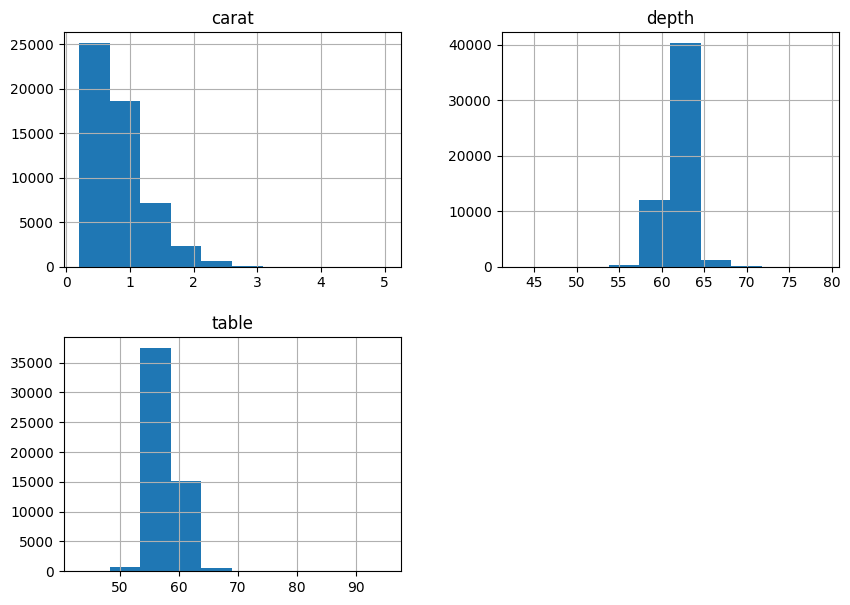

In [9]:
# Loot at histogram of non-dimensional values
_ = ddf.hist(["carat", "depth", "table"], figsize = (10, 7))

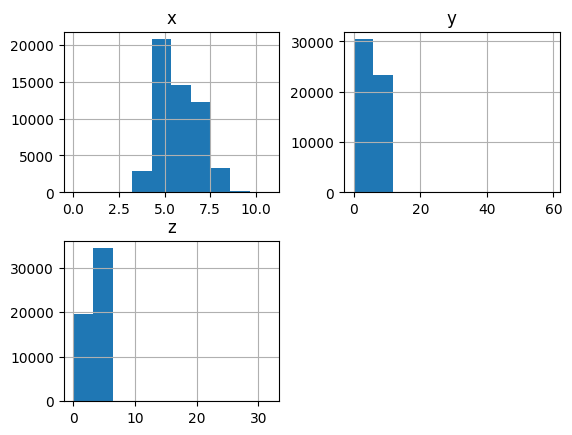

In [10]:
# Look at histograms of dimensional values
_ = ddf.hist(["x", "y", "z"])

### Findings from step 7:

* All the colums are relatively distributed
* Some columns have outliers:
  * Depth < 45
  * Tabel > 80

## Step 8: Feature Selection based on Distrabuitons

Categorical columns: cut, color, and clarity and continuous columns: carat, depth, and table will all be selected as they all have good distributions.

The dimensional columns: x, y, and z will not be selected for training due to them seeming redundant as table and depth encode similar data. However, x, y, and z will come in handy for invalid data analysis.

## Step 9: Removal of Outliers and Missing or Invalid Data

In this step we will clean our data. This will allow our analysis to be easier as well as increasing the performance of our models.

In [11]:
# Remove outliers
print("Rows before outlier removal:", len(ddf), end = "")
ddf = ddf[(ddf.table < 80)]
ddf = ddf[(ddf.depth > 45)]
print(", and after:", len(ddf))

Rows before outlier removal: 53794, and after: 53790


In [12]:
# Check for any missing values
ddf.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [13]:
# Calculates the maximum carat a diamond could have given its dimensions
def max_diamond_carat(x: float, y: float, z: float) -> float:
   return x * y * z * 0.0352 * 0.2

# Filter out diamonds with negative dimensions
print("Rows before negative size removal:", len(ddf), end = "")
ddf = ddf[(ddf.x > 0) & (ddf.y > 0) & (ddf.z > 0)]
print(", and after:", len(ddf))

# Filter out diamonds with carats greater than their theoretical maximum (based on dimensions)
print("Rows before invalid carat removal:", len(ddf), end = "")
ddf = ddf[ddf.carat <= max_diamond_carat(ddf.x, ddf.y, ddf.z)]
print(", and after:", len(ddf))

# Filter diamonds of strange shape (more than 30% lighter than its max carat)
print("Rows before low carat removal:", len(ddf), end = "")
ddf = ddf[((w := max_diamond_carat(ddf.x, ddf.y, ddf.z)) - ddf.carat) / w <= 0.3]
print(", and after:", len(ddf))

Rows before negative size removal: 53790, and after: 53771
Rows before invalid carat removal: 53771, and after: 53748
Rows before low carat removal: 53748, and after: 53736


### Findings from step 9:

* Only 4 outliers removed
* There were no missing values
* Invalid data removal deleted only 54 rows

## Step 10: Correlation Analysis

In this step we will analyse the correlation each of our selected columns have in regards to the price.

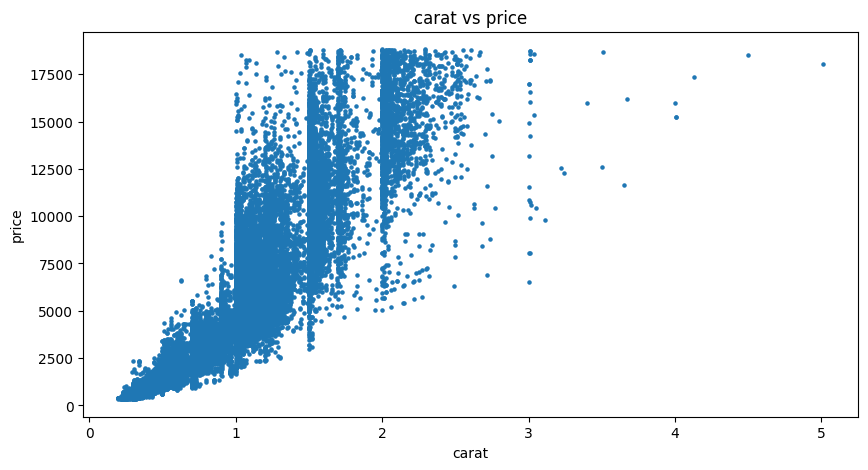

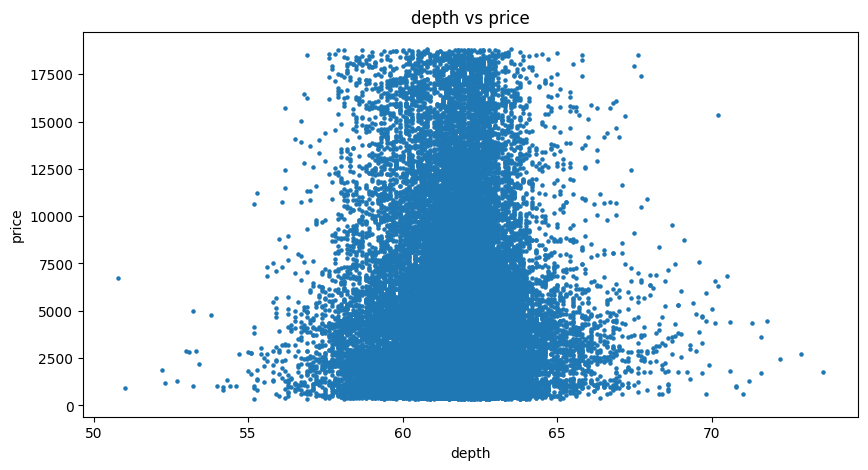

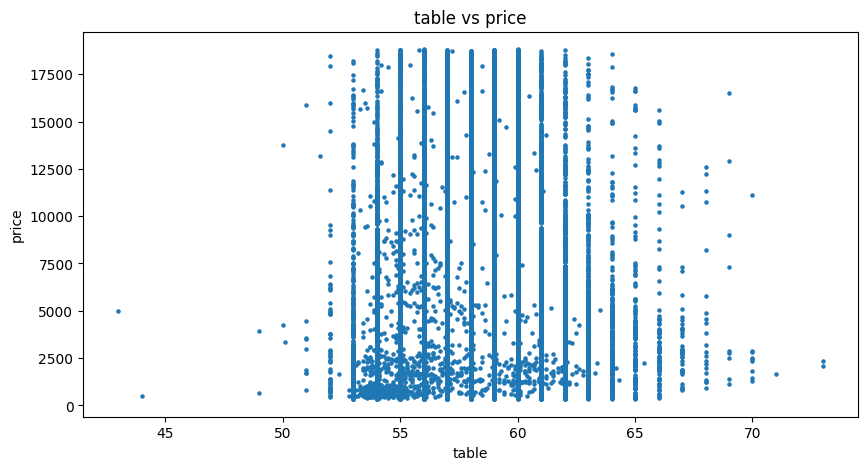

In [14]:
# Scatter plot all continuous selected columns
for p in ["carat", "depth", "table"]:
  ddf.plot.scatter(x = p, y = "price", title = f"{p} vs price", marker = ".", figsize = (10, 5))

In [15]:
# Get correlation value for each selected column (as well as x, y, and z)
ddf[["price", "carat", "depth", "table", "x", "y", "z"]].corr()

,price,carat,depth,table,x,y,z
price,1.000000,0.921551,-0.011073,0.126444,0.887289,0.888969,0.882678
carat,0.921551,1.000000,0.028297,0.181091,0.978002,0.977275,0.977287
depth,-0.011073,0.028297,1.000000,-0.304746,-0.025012,-0.027859,0.096957
table,0.126444,0.181091,-0.304746,1.000000,0.195735,0.189791,0.155069
x,0.887289,0.978002,-0.025012,0.195735,1.000000,0.998905,0.991964
y,0.888969,0.977275,-0.027859,0.189791,0.998905,1.000000,0.991612
z,0.882678,0.977287,0.096957,0.155069,0.991964,0.991612,1.000000


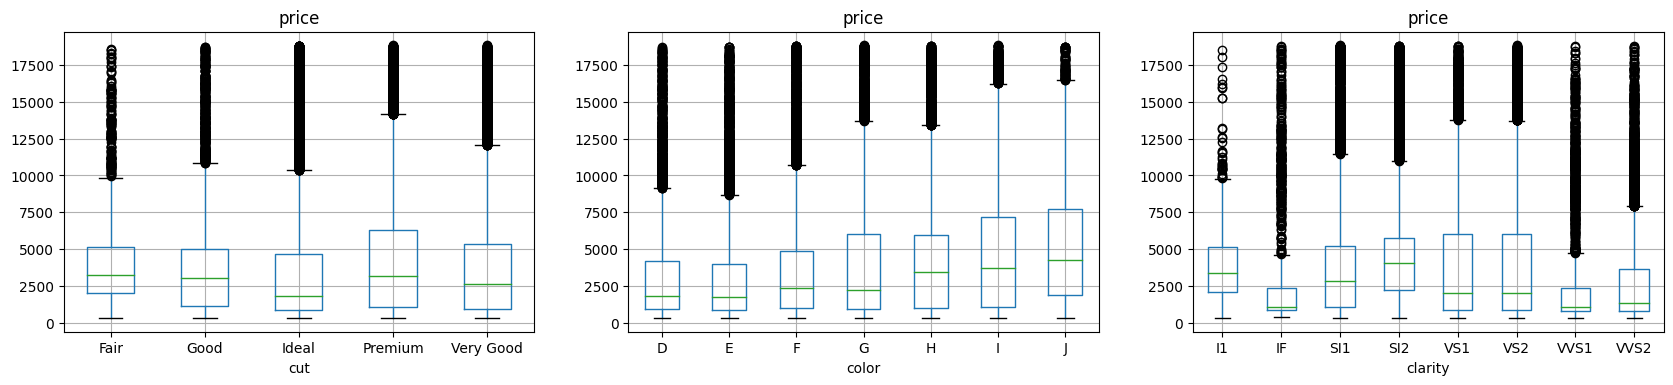

In [16]:
def plt_box(preds, target, data):
  fig, axis = plt.subplots(ncols = len(preds), figsize = (20, 4))

  for i, c in enumerate(preds):
    data.boxplot(column = target, by = c, ax = axis[i])

  fig.suptitle("")

# Box plot categorical data
plt_box(["cut", "color", "clarity"], "price", ddf)

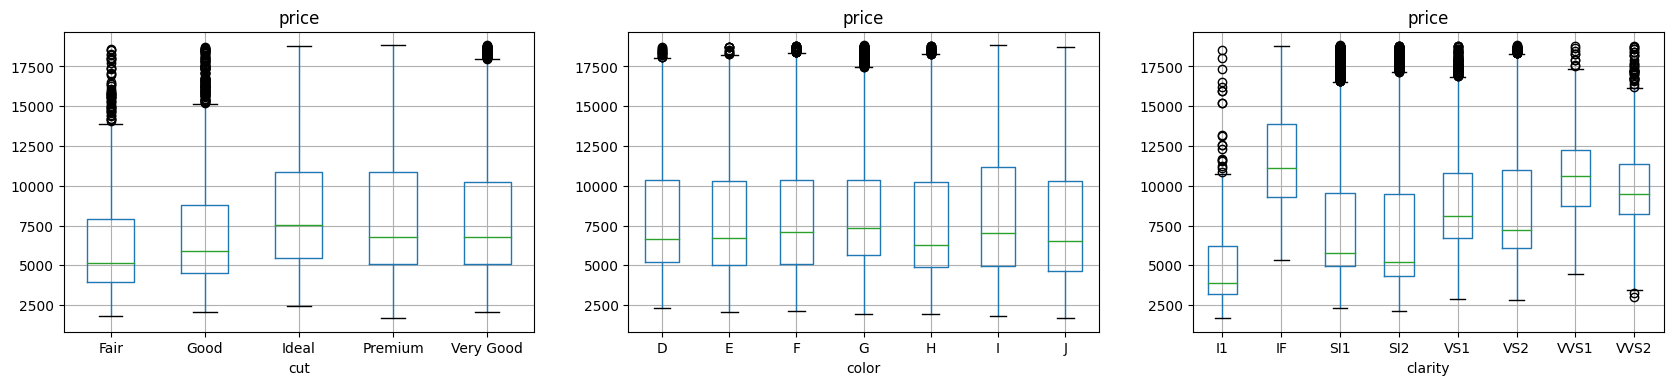

In [17]:
# Box plot categorical data when carat >= 1
plt_box(["cut", "color", "clarity"], "price", ddf[ddf.carat >= 1])

### Findings from step 10:

#### Continuous Data Findings:

* Carat is highly correlated with price
* Table and depth unfortunately seem to be unrelated to price
* Table shows strange banding
* x, y, and z are correlated with price however they are also highly related to carrat confirming their redundancy

#### Catagorigal Data Findings:

* When the carat of a diamond is low categorical data has much less of a correlation
* Every category seems to have some correlation to price. However, cut and clarity have the greatest

#### Final Selected Columns:
* Carat: Greatest correlation
* Clarity: Good correlation given low and high carat diamonds
* Cut: Good correlation given high carat diamonds and a small correlation with low carat ones
* Color: Slight correlation




## Step 11: Data Conversion for ML

In this step we will convert our categorical data into numeric values in order to feed it into different linear regression models. In addition, we will split our data into training and testing sets, so that we can evaluate each models performance on data its never seen.

In [18]:
# Selection of final predictors
final_predictors = ["carat", "cut", "color", "clarity"]
final_target = "price"

# Create final dataset
f_ddf = ddf[final_predictors + [final_target]].copy()

# Replaces string data with ordered numbers
def numericasise(data, values):
  for (n, v) in enumerate(values):
    data.replace(v, n + 1, inplace = True)

# Replace all categorial data with numeric representations
numericasise(f_ddf.cut, ["Fair", "Good", "Very Good", "Premium", "Ideal"])
numericasise(f_ddf.color, ["J", "I", "H", "G", "F", "E", "D"])
numericasise(f_ddf.clarity, ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"])

from sklearn.model_selection import train_test_split
train_inp, test_inp, train_out, test_out = train_test_split(
    f_ddf[final_predictors].values,
    f_ddf[final_target].values,
    test_size = 0.3
)

# Look at new data
f_ddf.head()

,carat,cut,color,clarity,price
0,0.23,5,6,2,326
1,0.21,4,6,3,326
2,0.23,2,6,5,327
3,0.29,4,2,4,334
4,0.31,2,1,2,335


## Step 12 & 13: Training, Testing, and Validating Multiple Regression Algorithms

We will train many different regression models and benchmark their accuracies.

In [19]:
# Calculates the accuracy between prediction and truth
def accuracy(truth, pred):
    return 100 - abs(truth - pred) / truth * 100

# Prints accuracy tests for a given model
def print_model_accuracy(model, train_inp, train_out, test_inp, test_out):
  # Train model
  m = model.fit(train_inp, train_out)

  # Print R2 score
  print(f"R2 Score: {sk.metrics.r2_score(train_out, m.predict(train_inp)) * 100:.2f}%")

  # Calculate accuracy
  acc = accuracy(test_out, m.predict(test_inp))

  print(f"Mean Accuracy (on test data): {acc.mean():.2f}%")
  print(f"Median Accuracy (on test data): {np.median(acc):.2f}%")

  # Create custom scorer
  scorer = sk.metrics.make_scorer(lambda t, p: np.mean(accuracy(t, p)))

  # Calculate 10-fold cross validation
  accs = sk.model_selection.cross_val_score(
      model,
      np.append(train_inp, test_inp, axis = 0),
      np.append(train_out, test_out, axis = 0),
      cv = 10, scoring = scorer
  )

  # Print 10-fold cross valadation
  print("10-fold cross validations: " + " ".join(map(lambda x: f"{x:.2f}%", accs)))
  print(f"10-fold cross validation mean: {np.mean(accs):.2f}%")

In [20]:
# Linear Regression
from sklearn.linear_model import LinearRegression

print("\nBasic Liner Regression Model:")
print_model_accuracy(
  LinearRegression(),
  train_inp, train_out, test_inp, test_out
)

# Decison Tree Regression
from sklearn.tree import DecisionTreeRegressor

print("\nDecision Tree Regressor Model:")
print_model_accuracy(
  DecisionTreeRegressor(),
  train_inp, train_out, test_inp, test_out
)

# K Nearest Neighbour Regression
from sklearn.neighbors import KNeighborsRegressor

print("\nKNeighbors Regressor Model:")
print_model_accuracy(
  KNeighborsRegressor(),
  train_inp, train_out, test_inp, test_out
)


Basic Liner Regression Model:
R2 Score: 90.39%
Mean Accuracy (on test data): 50.55%
Median Accuracy (on test data): 77.13%
10-fold cross validations: 51.16% 51.50% 51.47% 50.87% 52.89% 50.48% 51.61% 50.23% 51.77% 50.13%
10-fold cross validation mean: 51.21%

Decision Tree Regressor Model:
R2 Score: 99.20%
Mean Accuracy (on test data): 91.41%
Median Accuracy (on test data): 93.55%
10-fold cross validations: 91.32% 91.58% 91.49% 91.52% 91.57% 91.60% 91.61% 91.53% 91.62% 91.41%
10-fold cross validation mean: 91.53%

KNeighbors Regressor Model:
R2 Score: 97.91%
Mean Accuracy (on test data): 90.60%
Median Accuracy (on test data): 93.47%
10-fold cross validations: 90.56% 91.16% 90.81% 90.83% 91.18% 91.22% 91.25% 91.06% 91.03% 90.84%
10-fold cross validation mean: 90.99%


## Step 14: Selection of Best Model

We will pick the Decision Tree Regressor Model, as it has the greatest accuracy across all benchmarks.

## Step 15: Model Deployment

In this step we will retrain the Decision Tree Regressor on our entire dataset this time. Then we will serialise it for use in our GUI app.

In [21]:
from sklearn.tree import DecisionTreeRegressor

# Retrain model
m = DecisionTreeRegressor().fit(f_ddf[final_predictors].values, f_ddf[final_target].values)

# Serialise and write model
with open("model", "wb") as f:
  ser = pickle.dump(m, f)

## Step 16: GUI App Development

See 'DiamondPredict.py' and https://github.com/Gaunsessa/ST1-Assignment

NOTE: sklearn version must be 1.2.2 otherwise the deserialisation of the model will fail

In [22]:
import subprocess
print(subprocess.getoutput("pip3 show scikit-learn"))

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick
